#                            NI He & GUETARI Bader - Big Data Analytics -  Soccer dataset - BI2

In [1]:
import os
import matplotlib
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

# Part I - Data pre-processing and cleaning

In [2]:
loc = './/football2//'
res_name = []  
my_dict = {}
filecsv_list = []  
def file_name(file_name):
    
    for root,dirs,files in os.walk(file_name):
        files.sort() 
        for i,file in enumerate(files):
            if os.path.splitext(file)[1] == '.csv':
                filecsv_list.append(file)
                res_name.append('raw_data_'+str(i+1))
                my_dict[i+1]= file.replace('.csv', '')
    print(res_name)
    print(filecsv_list)
file_name(loc)

['raw_data_1', 'raw_data_2', 'raw_data_3', 'raw_data_4', 'raw_data_5', 'raw_data_6', 'raw_data_7', 'raw_data_8', 'raw_data_9', 'raw_data_10', 'raw_data_11']
['2010-11.csv', '2011-12.csv', '2012-13.csv', '2013-14.csv', '2014-15.csv', '2015-16.csv', '2016-17.csv', '2017-18.csv', '2018-19.csv', '2019-20.csv', '2020-21.csv']


In [3]:
time_list = [filecsv_list[i][0:4]  for i in range(len(filecsv_list))]
time_list

['2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

In [4]:
for i in range(len(res_name)):
    res_name[i] = pd.read_csv(loc+filecsv_list[i],error_bad_lines=False)
    print('the%2s document is %s,size is %s'%(i+1,filecsv_list[i],res_name[i].shape))

the 1 document is 2010-11.csv,size is (380, 71)
the 2 document is 2011-12.csv,size is (380, 71)
the 3 document is 2012-13.csv,size is (380, 74)
the 4 document is 2013-14.csv,size is (380, 68)
the 5 document is 2014-15.csv,size is (381, 68)
the 6 document is 2015-16.csv,size is (380, 65)
the 7 document is 2016-17.csv,size is (380, 65)
the 8 document is 2017-18.csv,size is (380, 65)
the 9 document is 2018-19.csv,size is (380, 62)
the10 document is 2019-20.csv,size is (380, 106)
the11 document is 2020-21.csv,size is (170, 106)


### Here we drop the csv which are not composed of 380 lines

In [5]:
for i in range(len(res_name),0,-1): 
    if res_name[i-1].shape[0] != 380:
        key = 'res_name[' + str(i) + ']'
        print('the drop data is：%s，csv：%s size：%s'%(time_list[i-1],key,res_name[i-1].shape))
        res_name.pop(i-1)
        time_list.pop(i-1)
        continue

the drop data is：2020，csv：res_name[11] size：(170, 106)
the drop data is：2014，csv：res_name[5] size：(381, 68)


In [6]:
res_name[0]['HomeTeam'].unique()

array(['Aston Villa', 'Blackburn', 'Bolton', 'Chelsea', 'Sunderland',
       'Tottenham', 'Wigan', 'Wolves', 'Liverpool', 'Man United',
       'Arsenal', 'Birmingham', 'Everton', 'Stoke', 'West Brom',
       'West Ham', 'Fulham', 'Newcastle', 'Man City', 'Blackpool'],
      dtype=object)

### Get the maximum number of columns in the list header and then the getter parameter

In [7]:
shape_list = [res_name[i].shape[1] for i in range(len(res_name))]
for i in range(len(res_name)):
    if res_name[i].shape[1] == max(shape_list):
        print('%s data is available in the maximum number of columns:%s,Column element table header：\n %s'%(time_list[i],max(shape_list),res_name[i].columns))

2019 data is available in the maximum number of columns:106,Column element table header：
 Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=106)


# Pre-processing and cleanning steps with features

### Data cleaning and pre-processing


Select information column

HomeTeam: Home team name

AwayTeam: Name of the away team

FTHG: All-time home team goals scored

FTAG: Full match away team goals scored

FTR: Match Result ( H= Home win, D= Draw, A= Away win)

In [8]:
# Put the selected information in a new list
columns_req = ['HomeTeam','AwayTeam','Date','FTHG','FTAG','FTR']
playing_statistics = []   # Create a repository for processed data names
playing_data = {}  # Key-value pairs to store data
for i in range(len(res_name)):
    playing_statistics.append('playing_statistics_'+str(i+1))
    playing_statistics[i] = res_name[i][columns_req]
    print(time_list[i],'playing_statistics['+str(i)+']',playing_statistics[i].shape)


2010 playing_statistics[0] (380, 6)
2011 playing_statistics[1] (380, 6)
2012 playing_statistics[2] (380, 6)
2013 playing_statistics[3] (380, 6)
2015 playing_statistics[4] (380, 6)
2016 playing_statistics[5] (380, 6)
2017 playing_statistics[6] (380, 6)
2018 playing_statistics[7] (380, 6)
2019 playing_statistics[8] (380, 6)


In [9]:
#We first predict that all home teams will win, and then we predict that all away teams will win, and compare the results:
def predictions_0(data):
    """ 
    When we count all home teams winning, what is our predicted result
    The return value is the predicted value and the actual value
    """
    predictions = []
    for _, game in data.iterrows():
        
        if game['FTR']=='H':
            predictions.append(1)
        else:
            predictions.append(0)
    # return predicted result
    return pd.Series(predictions)

# Then we predict the results of all 9 years of home teams winning to get the accuracy of the prediction.
avg_acc_sum = 0
for i in range(len(playing_statistics)):
    predictions = predictions_0(playing_statistics[i])
    acc=sum(predictions)/len(playing_statistics[i])
    avg_acc_sum += acc
    print("%s year the accuracy of the home “shutout” prediction is%s"%(time_list[i],acc))
print('all %s years average accuracy is：%s'%(len(playing_statistics),avg_acc_sum/len(playing_statistics)))

2010 year the accuracy of the home “shutout” prediction is0.4710526315789474
2011 year the accuracy of the home “shutout” prediction is0.45
2012 year the accuracy of the home “shutout” prediction is0.4368421052631579
2013 year the accuracy of the home “shutout” prediction is0.4710526315789474
2015 year the accuracy of the home “shutout” prediction is0.4131578947368421
2016 year the accuracy of the home “shutout” prediction is0.4921052631578947
2017 year the accuracy of the home “shutout” prediction is0.45526315789473687
2018 year the accuracy of the home “shutout” prediction is0.4763157894736842
2019 year the accuracy of the home “shutout” prediction is0.45263157894736844
all 9 years average accuracy is：0.4576023391812865


### Accuracy of statistics that all away teams will win

In [10]:
def predictions_1(data):
    """ 
    When we count all away teams winning, what is our predicted result
    The return value is the predicted value and the actual value
    """
    predictions = []
    for _, game in data.iterrows():
        
        if game['FTR']=='A':
            predictions.append(1)
        else:
            predictions.append(0)
    return pd.Series(predictions)
avg_acc_sum = 0
for i in range(len(playing_statistics)):
    predictions = predictions_1(playing_statistics[i])
    acc=sum(predictions)/len(playing_statistics[i])
    avg_acc_sum += acc
    print("%s year the accuracy of the away “shutout” prediction is%s"%(time_list[i],acc))
print('all %s years average accuracy is：%s'%(len(playing_statistics),avg_acc_sum / len(playing_statistics)))

print('so we can see that the probability of a home win is indeed greater than that of a loss or a draw')

2010 year the accuracy of the away “shutout” prediction is0.23684210526315788
2011 year the accuracy of the away “shutout” prediction is0.30526315789473685
2012 year the accuracy of the away “shutout” prediction is0.2789473684210526
2013 year the accuracy of the away “shutout” prediction is0.3236842105263158
2015 year the accuracy of the away “shutout” prediction is0.30526315789473685
2016 year the accuracy of the away “shutout” prediction is0.2868421052631579
2017 year the accuracy of the away “shutout” prediction is0.28421052631578947
2018 year the accuracy of the away “shutout” prediction is0.3368421052631579
2019 year the accuracy of the away “shutout” prediction is0.30526315789473685
all 9 years average accuracy is：0.29590643274853806
so we can see that the probability of a home win is indeed greater than that of a loss or a draw


### Structural Features

**Calculate the net goal difference per team per week**

In [11]:
def get_goals_diff(playing_stat):
    # Create a dictionary with the name of each team as the key
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = []
    # for each match
    for i in range(len(playing_stat)):
        # Full-Time,HostTeam goals
        HTGS = playing_stat.iloc[i]['FTHG']
        # Full_Time,AwayTeam goals
        ATGS = playing_stat.iloc[i]['FTAG']

        # Add the goal difference of the home team to the corresponding home team in the team dictionary
        teams[playing_stat.iloc[i].HomeTeam].append(HTGS-ATGS)
        # Add the goal difference of the away team to the corresponding away team in the team dictionary
        teams[playing_stat.iloc[i].AwayTeam].append(ATGS-HTGS)

    # Create a dataframe of GoalsDifference
    # rows are team columns are matchweek,
    # 39 Explanation: 19 teams, each team is divided into home and away 2 times, a total of 38 matches
    # But the range can not take the last value, so 38 + 1 = 39
    GoalsDifference = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsDifference[0] = 0
    # Add up the goal difference of each team's weekly matches
    for i in range(2,39):
        GoalsDifference[i] = GoalsDifference[i] + GoalsDifference[i-1]
    return GoalsDifference

def get_gss(playing_stat):
    # Get goal difference statistics
    GD = get_goals_diff(playing_stat)
    j = 0
    #  Goal difference between home and away games
    HTGD = []
    ATGD = []
    # Total 380 matches in one year
    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTGD.append(GD.loc[ht][j])
        ATGD.append(GD.loc[at][j])
        if ((i + 1)% 10) == 0:
            j = j + 1
    # Add the HTGD ATGD information for each team to the dataframe
    playing_stat.loc[:,'HTGD'] = HTGD
    playing_stat.loc[:,'ATGD'] = ATGD
    return playing_stat

for i in range(len(playing_statistics)):
    playing_statistics[i] = get_gss(playing_statistics[i])

print('we can find until the number 378 match .West Ham net goals is -24')
playing_statistics[0].tail()


d:\nasdaq\venv\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
d:\nasdaq\venv\lib\site-packages\pandas\core\indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


we can find until the number 378 match .West Ham net goals is -24


,HomeTeam,AwayTeam,Date,FTHG,FTAG,FTR,HTGD,ATGD
375,Newcastle,West Brom,22/05/11,3,3,D,-1,-15
376,Stoke,Wigan,22/05/11,0,1,A,-1,-22
377,Tottenham,Birmingham,22/05/11,2,1,H,8,-20
378,West Ham,Sunderland,22/05/11,0,3,A,-24,-14
379,Wolves,Blackburn,22/05/11,2,3,A,-19,-14


### Statistics of cumulative goals by home and away teams up to the current game week

In [12]:
#Convert the result of the game into points, 
# W 3 points
# D 1 points
# L 0 points

def get_points(result):
    if result == 'W':
        return 3
    elif result == 'D':
        return 1
    else:
        return 0
    
def get_cuml_points(matchres):
    matchres_points = matchres.applymap(get_points)
    for i in range(2,39):
        matchres_points[i] = matchres_points[i] + matchres_points[i-1]
    matchres_points.insert(column =0, loc = 0, value = [0*i for i in range(20)])
    return matchres_points

def get_matchres(playing_stat):
    
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = []
    
    for i in range(len(playing_stat)):
        if playing_stat.iloc[i].FTR == 'H':
            # HomeTeam win
            # HomeTeam W, and AwayTeam L
            teams[playing_stat.iloc[i].HomeTeam].append('W')
            teams[playing_stat.iloc[i].AwayTeam].append('L')
        elif playing_stat.iloc[i].FTR == 'A':
            # AwayTeam win
            # HomeTeam L and AwayTeam W
            teams[playing_stat.iloc[i].AwayTeam].append('W')
            teams[playing_stat.iloc[i].HomeTeam].append('L')
        else:
            # Tie
            teams[playing_stat.iloc[i].AwayTeam].append('D')
            teams[playing_stat.iloc[i].HomeTeam].append('D')
    return pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T

def get_agg_points(playing_stat):
    matchres = get_matchres(playing_stat)
    cum_pts = get_cuml_points(matchres)
    HTP = []
    ATP = []
    j = 0
    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTP.append(cum_pts.loc[ht][j])
        ATP.append(cum_pts.loc[at][j])

        if ((i + 1)% 10) == 0:
            j = j + 1
    # Cumulative Home Score
    playing_stat.loc[:,'HTP'] = HTP
    # Cumulative Away Score
    playing_stat.loc[:,'ATP'] = ATP
    return playing_stat

for i in range(len(playing_statistics)):
    playing_statistics[i] = get_agg_points(playing_statistics[i])
    

playing_statistics[0].tail()

d:\nasdaq\venv\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
d:\nasdaq\venv\lib\site-packages\pandas\core\indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,HomeTeam,AwayTeam,Date,FTHG,FTAG,FTR,HTGD,ATGD,HTP,ATP
375,Newcastle,West Brom,22/05/11,3,3,D,-1,-15,45,46
376,Stoke,Wigan,22/05/11,0,1,A,-1,-22,46,39
377,Tottenham,Birmingham,22/05/11,2,1,H,8,-20,59,39
378,West Ham,Sunderland,22/05/11,0,3,A,-24,-14,33,44
379,Wolves,Blackburn,22/05/11,2,3,A,-19,-14,40,40


### Statistics of a team's performance in the last three matches

***HM1 stands for the home team's last game won or lost.***

***AM1 represents the last match won or lost by the away team.***

In [13]:
def get_form(playing_stat,num):
    form = get_matchres(playing_stat)
    form_final = form.copy()
    for i in range(num,39):
        form_final[i] = ''
        j = 0
        while j < num:
            form_final[i] += form[i-j]
            j += 1
    return form_final

def add_form(playing_stat,num):
    form = get_form(playing_stat,num)
    # M is for unknown, because there is not that much history
    h = ['M' for i in range(num * 10)]
    a = ['M' for i in range(num * 10)]
    j = num
    for i in range((num*10),380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam

        past = form.loc[ht][j]
        h.append(past[num-1])

        past = form.loc[at][j]
        a.append(past[num-1])

        if ((i + 1)% 10) == 0:
            j = j + 1

    playing_stat['HM' + str(num)] = h
    playing_stat['AM' + str(num)] = a

    return playing_stat

def add_form_df(playing_statistics):
    playing_statistics = add_form(playing_statistics,1)
    playing_statistics = add_form(playing_statistics,2)
    playing_statistics = add_form(playing_statistics,3)
    return playing_statistics

for i in range(len(playing_statistics)):
    playing_statistics[i] = add_form_df(playing_statistics[i])

playing_statistics[0].tail()

<ipython-input-13-50c21c054388>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HM' + str(num)] = h
<ipython-input-13-50c21c054388>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['AM' + str(num)] = a


,HomeTeam,AwayTeam,Date,FTHG,FTAG,FTR,HTGD,ATGD,HTP,ATP,HM1,AM1,HM2,AM2,HM3,AM3
375,Newcastle,West Brom,22/05/11,3,3,D,-1,-15,45,46,D,W,W,L,L,W
376,Stoke,Wigan,22/05/11,0,1,A,-1,-22,46,39,L,W,W,D,D,D
377,Tottenham,Birmingham,22/05/11,2,1,H,8,-20,59,39,W,L,L,L,D,D
378,West Ham,Sunderland,22/05/11,0,3,A,-24,-14,33,44,L,L,D,W,L,L
379,Wolves,Blackburn,22/05/11,2,3,A,-19,-14,40,40,W,D,W,D,D,W


In [14]:
#Join the competition week feature (the first few competition weeks) MW
def get_mw(playing_stat):
    j = 1
    MatchWeek = []
    for i in range(380):
        MatchWeek.append(j)
        if ((i + 1)% 10) == 0:
            j = j + 1
    playing_stat['MW'] = MatchWeek
    return playing_stat

for i in range(len(playing_statistics)):
    playing_statistics[i] = get_mw(playing_statistics[i])
    
playing_statistics[1]

<ipython-input-14-86d018185c15>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['MW'] = MatchWeek


,HomeTeam,AwayTeam,Date,FTHG,FTAG,FTR,HTGD,ATGD,HTP,ATP,HM1,AM1,HM2,AM2,HM3,AM3,MW
0,Blackburn,Wolves,13/08/11,1,2,A,0,0,0,0,M,M,M,M,M,M,1
1,Fulham,Aston Villa,13/08/11,0,0,D,0,0,0,0,M,M,M,M,M,M,1
2,Liverpool,Sunderland,13/08/11,1,1,D,0,0,0,0,M,M,M,M,M,M,1
3,Newcastle,Arsenal,13/08/11,0,0,D,0,0,0,0,M,M,M,M,M,M,1
4,QPR,Bolton,13/08/11,0,4,A,0,0,0,0,M,M,M,M,M,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Sunderland,Man United,13/05/12,0,1,A,0,55,45,86,L,W,D,L,D,D,38
376,Swansea,Liverpool,13/05/12,1,0,H,-8,8,44,52,L,W,D,L,D,W,38
377,Tottenham,Fulham,13/05/12,2,0,H,23,-1,66,52,D,W,W,W,W,L,38
378,West Brom,Arsenal,13/05/12,2,3,A,-6,24,47,67,D,D,D,D,W,D,38


In [15]:
# merging all the list
playing_stat = pd.concat(playing_statistics, ignore_index=True)

# The values of HTGD, ATGD ,HTP, ATP were divided by the number of weeks to obtain the average score
cols = ['HTGD','ATGD','HTP','ATP']
playing_stat.MW = playing_stat.MW.astype(float)
for col in cols:
    playing_stat[col] = playing_stat[col] / playing_stat.MW
    
playing_stat.tail()

,HomeTeam,AwayTeam,Date,FTHG,FTAG,FTR,HTGD,ATGD,HTP,ATP,HM1,AM1,HM2,AM2,HM3,AM3,MW
3415,Leicester,Man United,26/07/2020,0,2,A,0.736842,0.736842,1.631579,1.657895,L,D,W,W,L,D,38.0
3416,Man City,Norwich,26/07/2020,5,0,H,1.631579,-1.157895,2.052632,0.552632,W,L,W,L,W,L,38.0
3417,Newcastle,Liverpool,26/07/2020,1,3,A,-0.473684,1.315789,1.157895,2.526316,D,W,L,L,L,D,38.0
3418,Southampton,Sheffield United,26/07/2020,3,1,H,-0.289474,0.052632,1.289474,1.421053,W,L,D,L,D,W,38.0
3419,West Ham,Aston Villa,26/07/2020,1,1,D,-0.342105,-0.684211,1.000000,0.894737,D,W,W,D,W,W,38.0


In [16]:
playing_stat_teams = playing_stat[['HomeTeam','AwayTeam','Date']]
playing_stat_teams

,HomeTeam,AwayTeam,Date
0,Aston Villa,West Ham,14/08/10
1,Blackburn,Everton,14/08/10
2,Bolton,Fulham,14/08/10
3,Chelsea,West Brom,14/08/10
4,Sunderland,Birmingham,14/08/10
...,...,...,...
3415,Leicester,Man United,26/07/2020
3416,Man City,Norwich,26/07/2020
3417,Newcastle,Liverpool,26/07/2020
3418,Southampton,Sheffield United,26/07/2020


In [17]:
#Remove intermediate features
playing_stat = playing_stat[playing_stat.MW > 3]
#playing_stat.drop(['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'MW'],1, inplace=True)

### Earlier, we calculated the home and away winning percentage for each year, now let's see if there are more home wins or away wins in the valid data.

In [18]:
# Total number of matches
n_matches = playing_stat.shape[0]

# Total number of features
n_features = playing_stat.shape[1] - 1

# Number of home wins
n_homewins = len(playing_stat[playing_stat.FTR == 'H'])

# Home Winning Percentage
win_rate = (float(n_homewins) / (n_matches)) * 100

# Print the results
print("Total number of matches: {}".format(n_matches))
print("Total number of features: {}".format(n_features))
print("Number of home wins: {}".format(n_homewins))
print("Home Winning Percentage: {:.2f}%".format(win_rate))
#46.22% is about the same as our previous prediction of 45%, proving that our constructive features are correct

Total number of matches: 3150
Total number of features: 16
Number of home wins: 1456
Home Winning Percentage: 46.22%


### After constructing the features, it is found that the proportion of home wins is close to 50% so for this triple classification problem, the label proportion is uneven. We reduce it to a 2 classification problem, that is, will the home team win? which is also a way to solve the problem of uneven labeling ratio.

In [19]:
def only_hw(string):
    if string == 'H':
        return 'H'
    else:
        return 'NH'
playing_stat['FTR'] = playing_stat.FTR.apply(only_hw)
# Dividing data into feature values and label values
X_all = playing_stat.drop(['FTR'],1)
y_all = playing_stat['FTR']

len(X_all)

3150

In [20]:
print(y_all)

30       H
31      NH
32       H
33      NH
34      NH
        ..
3415    NH
3416     H
3417    NH
3418     H
3419    NH
Name: FTR, Length: 3150, dtype: object


In [21]:
def convert_1(data):
    max=data.max()
    min=data.min()
    return (data-min)/(max-min)
r_data=convert_1(X_all['HTGD'])

# Data standardization
cols = [['HTGD','ATGD','HTP','ATP']]
for col in cols:
    X_all[col] = scale(X_all[col])

In [22]:
X_all.HomeTeam = X_all.HomeTeam.astype('string')
X_all.AwayTeam = X_all.AwayTeam.astype('string')
X_all.Date = X_all.Date.astype('datetime64')
print(X_all.dtypes)

HomeTeam            string
AwayTeam            string
Date        datetime64[ns]
FTHG                 int64
FTAG                 int64
HTGD               float64
ATGD               float64
HTP                float64
ATP                float64
HM1                 object
AM1                 object
HM2                 object
AM2                 object
HM3                 object
AM3                 object
MW                 float64
dtype: object


In [23]:
X_all

,HomeTeam,AwayTeam,Date,FTHG,FTAG,HTGD,ATGD,HTP,ATP,HM1,AM1,HM2,AM2,HM3,AM3,MW
30,Arsenal,Bolton,2010-11-09,4,1,2.346720,0.645734,0.966714,-0.075015,W,D,W,W,D,D,4.0
31,Everton,Man United,2010-11-09,3,3,-0.648762,1.978979,-2.042997,0.934098,L,W,D,D,L,W,4.0
32,Fulham,Wolves,2010-11-09,2,1,0.016901,0.312422,-1.039760,-0.075015,D,D,D,D,D,W,4.0
33,Man City,Blackburn,2010-11-09,1,1,0.682563,-0.354200,-0.538141,-1.084128,L,L,W,L,D,W,4.0
34,Newcastle,Blackpool,2010-11-09,0,2,1.015395,-0.687512,-0.538141,-0.579572,D,D,W,L,L,W,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,Leicester,Man United,2020-07-26,0,2,0.997877,0.961502,0.729106,0.748209,L,D,W,W,L,D,38.0
3416,Man City,Norwich,2020-07-26,5,0,2.189063,-1.564647,1.573937,-1.482463,W,L,W,L,W,L,38.0
3417,Newcastle,Liverpool,2020-07-26,1,3,-0.613727,1.733381,-0.221330,2.500880,D,W,L,L,L,D,38.0
3418,Southampton,Sheffield United,2020-07-26,3,1,-0.368483,0.049282,0.042680,0.270208,W,L,D,L,D,W,38.0


In [24]:
def preprocess_features(X):
    '''Converting discrete type features to dummy encoded features  '''
    output = pd.DataFrame(index = X.index)
    for col, col_data in X.iteritems():
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
        output = output.join(col_data)
    return output

X_all = preprocess_features(X_all)
print("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (28 total features):
['HomeTeam', 'AwayTeam', 'Date', 'FTHG', 'FTAG', 'HTGD', 'ATGD', 'HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_W', 'AM1_D', 'AM1_L', 'AM1_W', 'HM2_D', 'HM2_L', 'HM2_W', 'AM2_D', 'AM2_L', 'AM2_W', 'HM3_D', 'HM3_L', 'HM3_W', 'AM3_D', 'AM3_L', 'AM3_W', 'MW']


In [25]:
print("\nFeature values:")
display(X_all)


Feature values:


,HomeTeam,AwayTeam,Date,FTHG,FTAG,HTGD,ATGD,HTP,ATP,HM1_D,...,AM2_D,AM2_L,AM2_W,HM3_D,HM3_L,HM3_W,AM3_D,AM3_L,AM3_W,MW
30,Arsenal,Bolton,2010-11-09,4,1,2.346720,0.645734,0.966714,-0.075015,0,...,0,0,1,1,0,0,1,0,0,4.0
31,Everton,Man United,2010-11-09,3,3,-0.648762,1.978979,-2.042997,0.934098,0,...,1,0,0,0,1,0,0,0,1,4.0
32,Fulham,Wolves,2010-11-09,2,1,0.016901,0.312422,-1.039760,-0.075015,1,...,1,0,0,1,0,0,0,0,1,4.0
33,Man City,Blackburn,2010-11-09,1,1,0.682563,-0.354200,-0.538141,-1.084128,0,...,0,1,0,1,0,0,0,0,1,4.0
34,Newcastle,Blackpool,2010-11-09,0,2,1.015395,-0.687512,-0.538141,-0.579572,1,...,0,1,0,0,1,0,0,0,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,Leicester,Man United,2020-07-26,0,2,0.997877,0.961502,0.729106,0.748209,0,...,0,0,1,0,1,0,1,0,0,38.0
3416,Man City,Norwich,2020-07-26,5,0,2.189063,-1.564647,1.573937,-1.482463,0,...,0,1,0,0,0,1,0,1,0,38.0
3417,Newcastle,Liverpool,2020-07-26,1,3,-0.613727,1.733381,-0.221330,2.500880,1,...,0,1,0,0,1,0,1,0,0,38.0
3418,Southampton,Sheffield United,2020-07-26,3,1,-0.368483,0.049282,0.042680,0.270208,0,...,0,1,0,1,0,0,0,0,1,38.0


In [26]:
X_all_complete = X_all[['HomeTeam','AwayTeam','Date']]
display(X_all_complete)

,HomeTeam,AwayTeam,Date
30,Arsenal,Bolton,2010-11-09
31,Everton,Man United,2010-11-09
32,Fulham,Wolves,2010-11-09
33,Man City,Blackburn,2010-11-09
34,Newcastle,Blackpool,2010-11-09
...,...,...,...
3415,Leicester,Man United,2020-07-26
3416,Man City,Norwich,2020-07-26
3417,Newcastle,Liverpool,2020-07-26
3418,Southampton,Sheffield United,2020-07-26


In [27]:
X_all.drop(['HomeTeam', 'AwayTeam','FTHG', 'FTAG', 'MW','Date'],1, inplace=True)
display(X_all)

,HTGD,ATGD,HTP,ATP,HM1_D,HM1_L,HM1_W,AM1_D,AM1_L,AM1_W,...,HM2_W,AM2_D,AM2_L,AM2_W,HM3_D,HM3_L,HM3_W,AM3_D,AM3_L,AM3_W
30,2.346720,0.645734,0.966714,-0.075015,0,0,1,1,0,0,...,1,0,0,1,1,0,0,1,0,0
31,-0.648762,1.978979,-2.042997,0.934098,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
32,0.016901,0.312422,-1.039760,-0.075015,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
33,0.682563,-0.354200,-0.538141,-1.084128,0,1,0,0,1,0,...,1,0,1,0,1,0,0,0,0,1
34,1.015395,-0.687512,-0.538141,-0.579572,1,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,0.997877,0.961502,0.729106,0.748209,0,1,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
3416,2.189063,-1.564647,1.573937,-1.482463,0,0,1,0,1,0,...,1,0,1,0,0,0,1,0,1,0
3417,-0.613727,1.733381,-0.221330,2.500880,1,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
3418,-0.368483,0.049282,0.042680,0.270208,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1


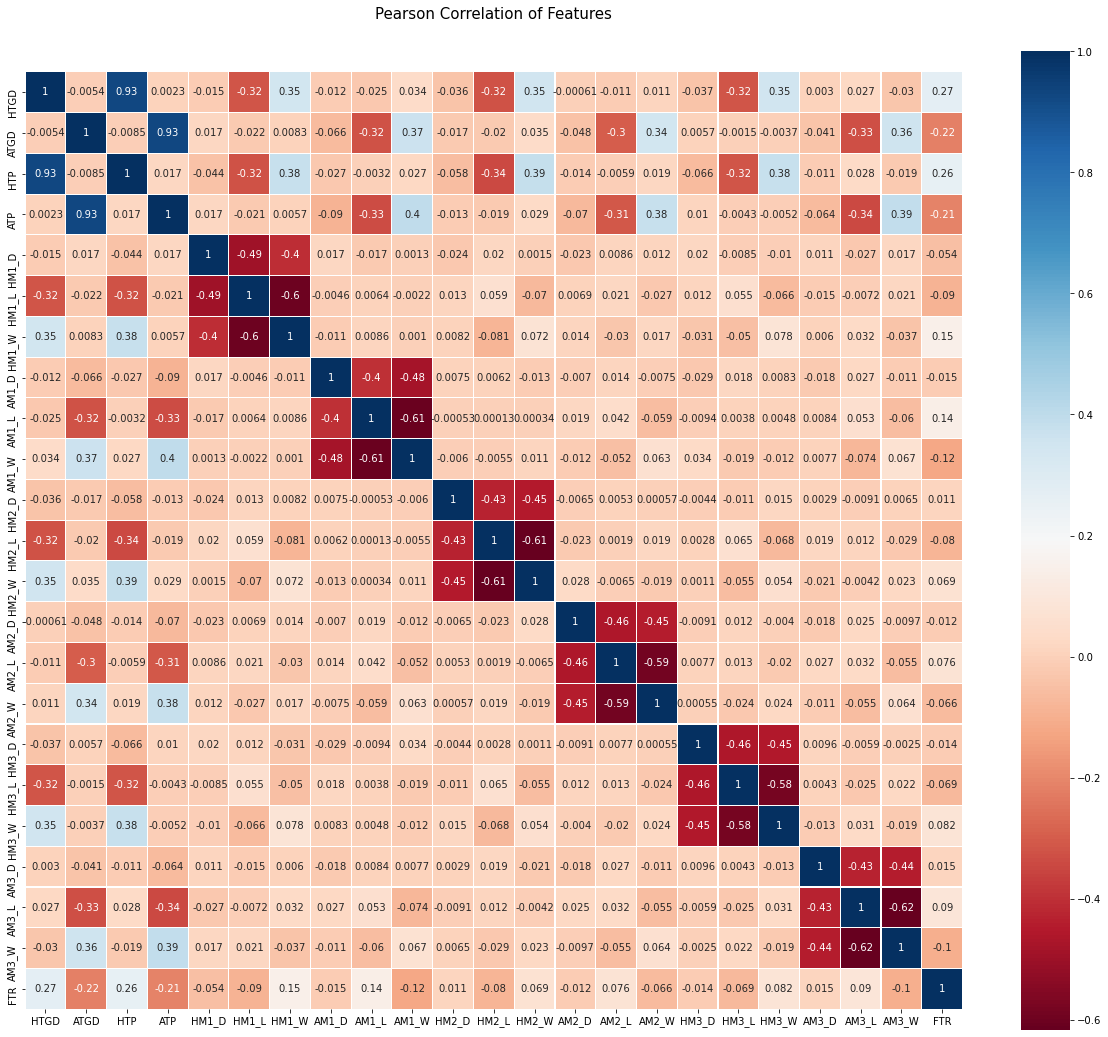

In [28]:
#Pearson Correlation heat map
# Making a Pearson Heat Map
# Mapping labels to 0 and 1
y_all=y_all.map({'NH':0,'H':1})
# Merging feature sets and labels
train_data=pd.concat([X_all,y_all],axis=1)
colormap = plt.cm.RdBu
plt.figure(figsize=(21,18))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_data.astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)

**The above graph shows that the HTP and HTGD features are strongly correlated, and the ATP and ATGD features are also strongly correlated, indicating a case of multicollinearity. It is also easy to understand that the higher the average home weekly score,the higher the average home weekly goal differential.**

**If we consider these variables, we can conclude that they give almost the same information and therefore multicollinearity actually occurs, and here we would consider removing the two features HTP and 'ATP' and keeping the two features HTGD and ATGD.**

**Pearson heat maps are well suited to detect this situation and they are an essential tool in feature engineering. Also, we can see that the results of the last team's last match have less influence on the results of the current match, and here we consider keeping these features.**

In [29]:
#Considering that the correlation between the sample set features HTP and HTGD, ATP and ATGD is over 90%,
#we remove the features HTP , ATP.
X_all=X_all.drop(['HTP','ATP'],axis=1)

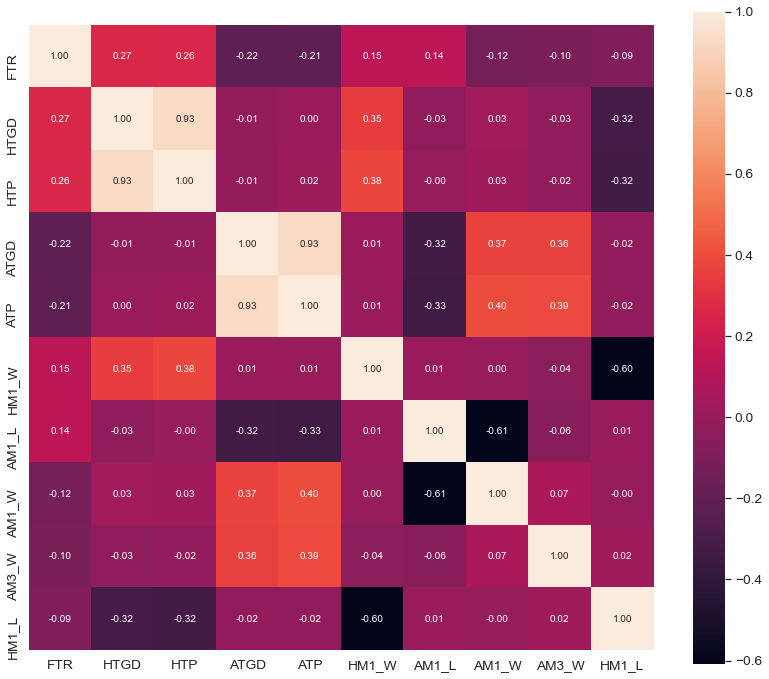

In [30]:
#Take a look at the 10 most relevant characteristics of FTR
#FTR correlation matrix
plt.figure(figsize=(14,12))
k = 10 # number of variables for heatmap
cols = abs(train_data.astype(float).corr()).nlargest(k, 'FTR')['FTR'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#We can see that the most relevant feature is HTGD, 
#which indicates that the higher a team's weekly average goal difference at home, the higher their probability of winning.

# Part II -  Predictions 

### We chose three prediction models, Logistic Regression, SVC and XGB Classifier. First, let's build the model

In [31]:
import joblib
import xgboost as xgb
from time import time
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all,test_size = 0.3,random_state = 2,stratify = y_all)

In [32]:
def train_classifier(clf, X_train, y_train):
    ''' Training models '''
    # Record training hours
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    print("train time {:.4f} second".format(end - start))
    
def predict_labels(clf, features, target):
    ''' Using models for forecasting '''
    # Recording of forecast hours
    start = time()
    y_pred = clf.predict(features)
    end = time()
    print("predict time in {:.4f} second".format(end - start))
    return f1_score(target, y_pred, pos_label=1), sum(target == y_pred) / float(len(y_pred))

def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and evaluate models '''
    # Indicate the classifier and the training set size
    print("Training {} model, number of samples {}。".format(clf.__class__.__name__, len(X_train)))
    # Training models
    train_classifier(clf, X_train, y_train)
    # Evaluating the model on the test set
    f1, acc = predict_labels(clf, X_train, y_train)
    print("The F1 scores and accuracies on the training set are: {:.4f} , {:.4f}。".format(f1 , acc))

    f1, acc = predict_labels(clf, X_test, y_test)
    print("The F1 scores and accuracies on the test set are: {:.4f} , {:.4f}。".format(f1 , acc))

In [33]:
# Build three separate models
clf_A = LogisticRegression(random_state = 42)
clf_B = SVC(random_state = 42, kernel='rbf',gamma='auto')
clf_C = xgb.XGBClassifier(seed = 42)

train_predict(clf_A, X_train, y_train, X_test, y_test)
print('')
train_predict(clf_B, X_train, y_train, X_test, y_test)
print('')
train_predict(clf_C, X_train, y_train, X_test, y_test)
print('')

Training LogisticRegression model, number of samples 2205。
train time 0.0477 second
predict time in 0.0040 second
The F1 scores and accuracies on the training set are: 0.6151 , 0.6658。
predict time in 0.0056 second
The F1 scores and accuracies on the test set are: 0.5621 , 0.6307。

Training SVC model, number of samples 2205。
train time 0.4489 second
predict time in 0.9058 second
The F1 scores and accuracies on the training set are: 0.6098 , 0.6807。
predict time in 0.3587 second
The F1 scores and accuracies on the test set are: 0.5210 , 0.6265。

Training XGBClassifier model, number of samples 2205。


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train time 1.0878 second
predict time in 0.0146 second
The F1 scores and accuracies on the training set are: 0.9538 , 0.9578。
predict time in 0.0092 second
The F1 scores and accuracies on the test set are: 0.5457 , 0.6159。



### We found that XGB Classifier performs very well in the training set, so we decided to use XGB Classifier and use Grid Search for tuning, and finally get the best model.

In [34]:
#  Set the parameters you want to auto-reference
parameters = { 'n_estimators':[90,100,110],
               'max_depth': [5,6,7],
             }
# Initialising the model
clf = xgb.XGBClassifier(seed=42)
f1_scorer = make_scorer(f1_score,pos_label=1)
# Auto-referencing with grid search
grid_obj = GridSearchCV(clf,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=5)
grid_obj = grid_obj.fit(X_train,y_train)
# Get the best model
clf = grid_obj.best_estimator_
# print(clf)
# View the final model results
f1, acc = predict_labels(clf, X_train, y_train)
print("F1 score and accuracy score for training set: {:.4f} , {:.4f}。".format(f1 , acc))

f1, acc = predict_labels(clf, X_test, y_test)
print("F1 score and accuracy score for test set: {:.4f} , {:.4f}。".format(f1 , acc))

[23:04:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


d:\nasdaq\venv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
predict time in 0.0075 second
F1 score and accuracy score for training set: 0.8834 , 0.8952。
predict time in 0.0040 second
F1 score and accuracy score for test set: 0.5279 , 0.5968。


In [35]:
#SaveModel
joblib.dump(clf, 'xgboost_model.model')
#ReadModel
xgb = joblib.load('xgboost_model.model')

In [36]:
# Then we try to make a prediction
#sample1 = X_test.sample(n=5,random_state=2)
#y_test_1 = y_test.sample(n=5,random_state=2)
sample1 = X_all[2800:3150]
y_test_1 = y_all[2800:3150]
print(sample1)
# Make predictions
y_pred = xgb.predict(sample1)

#merge 2 tables
y_test_1=y_test_1.to_frame()
from pandas import Series,DataFrame
y_test_1=y_test_1.join(playing_stat_teams, lsuffix='_y_test_1', rsuffix='_playing_stat_teams')

#calculate the accurancy
#change them to arry, and sum them
y_ftr = y_test_1.FTR.to_frame()
y_ftr=y_ftr.to_numpy()
y_pred_dataframe = pd.DataFrame(y_pred)
y_pred_dataframe = y_pred_dataframe.to_numpy()
a = y_pred_dataframe-y_ftr

import time
import numpy as np
a[a < 0] = 1
num = a.sum()
print("\nThe True FTR is:\n%s \nThe Prediction FTR is:%s"%(y_test_1,y_pred))
print("\naccurancy is", (350-num)/350)

          HTGD      ATGD  HM1_D  HM1_L  HM1_W  AM1_D  AM1_L  AM1_W  HM2_D  \
3070 -0.648762  0.979045      0      0      1      0      1      0      0   
3071 -0.981593 -0.020889      0      0      1      0      1      0      1   
3072  0.016901 -0.354200      0      0      1      0      0      1      0   
3073  0.349732 -0.354200      0      0      1      0      1      0      1   
3074  2.346720  0.312422      0      0      1      0      1      0      1   
...        ...       ...    ...    ...    ...    ...    ...    ...    ...   
3415  0.997877  0.961502      0      1      0      1      0      0      0   
3416  2.189063 -1.564647      0      0      1      0      1      0      0   
3417 -0.613727  1.733381      1      0      0      0      0      1      0   
3418 -0.368483  0.049282      0      0      1      0      1      0      1   
3419 -0.438553 -0.933109      1      0      0      0      0      1      0   

      HM2_L  HM2_W  AM2_D  AM2_L  AM2_W  HM3_D  HM3_L  HM3_W  AM3_D  AM3_L 

# Part III - Data visualization

### We can create analyse insights (how many wins per seasons ? Is a team more successful outside than inside ?)

### 1 - Visualization to see the number of wins per season

In [37]:
#For every season, we add to a dictionnary the number of matchs won by adding all the won games when the team performs
#at home and away
def getChart(team):
    file = "football2"
    columns = ["Div", "Date", "HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR"]
    df_list = list()
    dict_to_Display = {}
    i = 1

    for csv_name in os.listdir(file):
        df = pd.read_csv(os.path.join(file, csv_name), delimiter=',', usecols=columns)
        df_list.append(df)
        astonVilla_home_rows = df.loc[((df["HomeTeam"] == team)) & ((df["FTR"]) == "H")]
        astonVilla_away_rows = df.loc[((df["AwayTeam"] == team)) & ((df["FTR"]) == "A")]
        numberOfWins = astonVilla_home_rows.shape[0] + astonVilla_away_rows.shape[0]
        dict_to_Display[my_dict[i]]= numberOfWins
        i = i + 1
        if(i == 11):
            break
    return dict_to_Display

#For every season, we add to a dictionnary the number of matchs won when the team performs at home
def getChartHome(team):
    file = "football2"
    columns = ["Div", "Date", "HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR"]
    df_list = list()
    dict_to_Display = {}
    i = 1

    for csv_name in os.listdir(file):
        df = pd.read_csv(os.path.join(file, csv_name), delimiter=',', usecols=columns)
        df_list.append(df)
        astonVilla_away_rows = df.loc[((df["HomeTeam"] == team)) & ((df["FTR"]) == "H")]
        numberOfWins = astonVilla_away_rows.shape[0]
        dict_to_Display[my_dict[i]]= numberOfWins
        i = i + 1
        if(i == 11):
            break
    return dict_to_Display

#For every season, we add to a dictionnary the number of matchs won when the team performs away
def getChartAway(team):
    file = "football2"
    columns = ["Div", "Date", "HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR"]
    df_list = list()
    dict_to_Display = {}
    i = 1

    for csv_name in os.listdir(file):
        df = pd.read_csv(os.path.join(file, csv_name), delimiter=',', usecols=columns)
        df_list.append(df)
        astonVilla_away_rows = df.loc[((df["AwayTeam"] == team)) & ((df["FTR"]) == "A")]
        numberOfWins = astonVilla_away_rows.shape[0]
        dict_to_Display[my_dict[i]]= numberOfWins
        i = i + 1
        if(i == 11):
            break
    return dict_to_Display

----------------Number of wins for  Aston Villa club from 2010 season to 2020 season-------------------


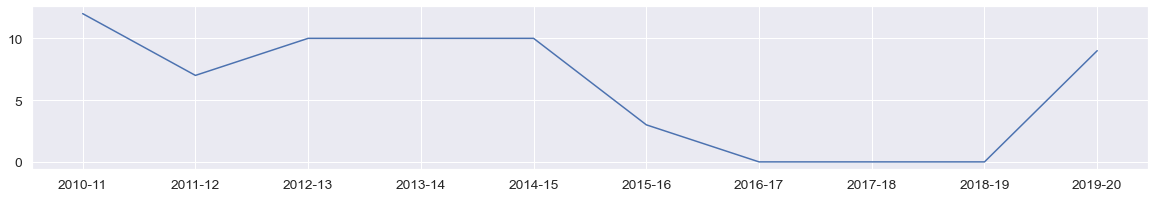




----------------Number of wins for  Arsenal club from 2010 season to 2020 season-------------------


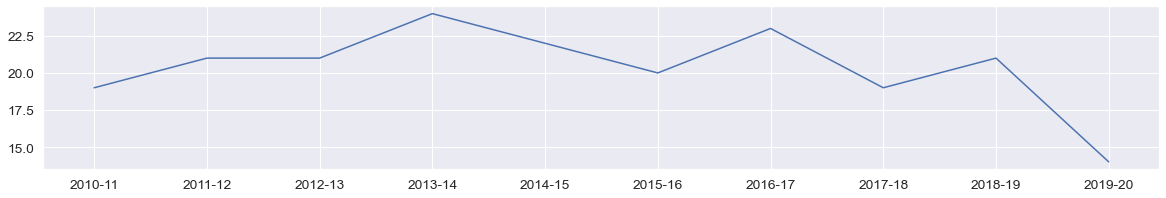




----------------Number of wins for  West Ham club from 2010 season to 2020 season-------------------


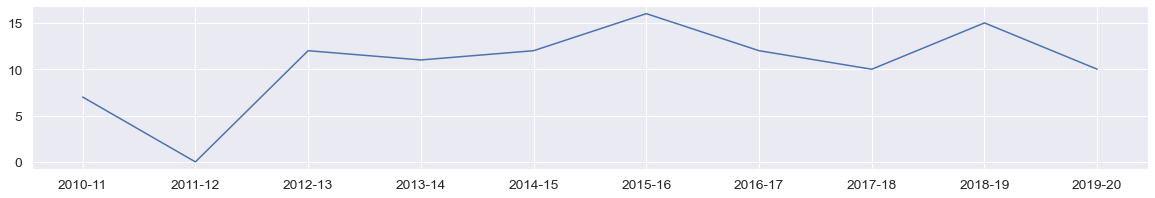




----------------Number of wins for  Everton club from 2010 season to 2020 season-------------------


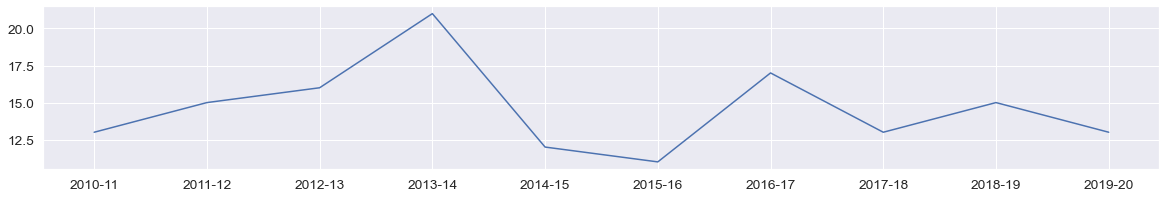

In [38]:
list_of_teams = ["Aston Villa", "Arsenal", "West Ham", "Everton"]

for i in list_of_teams:
    dictionnary = getChart(i)
    lists = sorted(dictionnary.items()) # sorted by key, return a list of tuples
    plt.rcParams["figure.figsize"] = (20,3)
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.plot(x, y)
    print("----------------Number of wins for ", i, "club from 2010 season to 2020 season-------------------")
    plt.show()
    print("\n\n")

### 2 - Visualization if a team is more successful away or at home
****Win rate when the team is away****

----------------Number of oustide wins for  Everton club from 2010 season to 2020 season-------------------


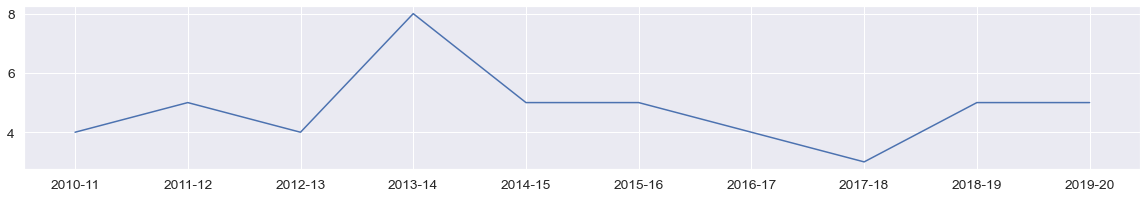

In [39]:
list_of_teams = ["Everton"]

for i in list_of_teams:
    dictionnary = getChartAway(i)
    lists = sorted(dictionnary.items())
    plt.rcParams["figure.figsize"] = (20,3)
    x, y = zip(*lists)
    plt.plot(x, y)
    print("----------------Number of oustide wins for ", i, "club from 2010 season to 2020 season-------------------")
    plt.show()
    print("\n\n")

****Win rate when the team is at home****

----------------Number of inside wins for  Everton club from 2010 season to 2020 season-------------------


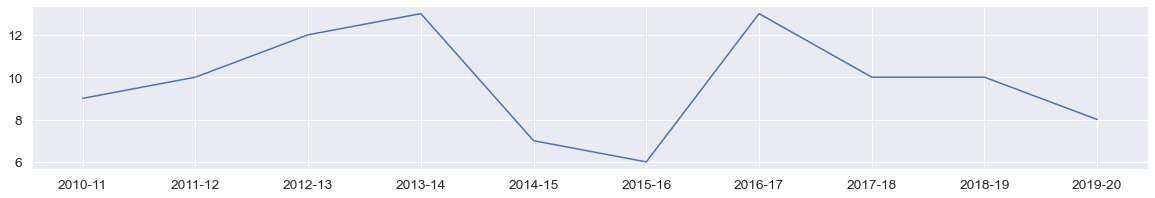

In [40]:
list_of_teams = ["Everton"]

for i in list_of_teams:
    dictionnary = getChartHome(i)
    lists = sorted(dictionnary.items())
    plt.rcParams["figure.figsize"] = (20,3)
    x, y = zip(*lists)
    plt.plot(x, y)
    print("----------------Number of inside wins for ", i, "club from 2010 season to 2020 season-------------------")
    plt.show()
    print("\n\n")

### Here, we can check a visualization concerning our predictions. We can predict, for a season the win rate of a team. Here is for Cheslay team for example.

----------------Number of inside wins for Chelsea club from 2010 season to 2020 season-------------------


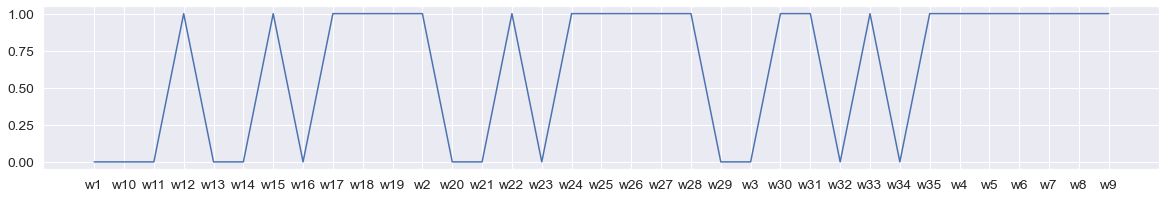

In [59]:
from collections import OrderedDict

ex = y_test_1.loc[((y_test_1["HomeTeam"] == "Chelsea")) | ((y_test_1["AwayTeam"] == "Chelsea"))]
ftr = ""
teamHome = ""
teamAway = ""
my_dict_predict = {}
a = 1

for i in range(len(ex)):
    numberOfWeek = "w" + str(a)
    ftr = ex.iloc[i,0]
    teamHome = ex.iloc[i,1]
    teamAway = ex.iloc[i,2]
    if (ftr == 0 and teamAway == "Chelsea"):
        my_dict_predict[numberOfWeek]=1
    elif (ftr == 1 and teamHome == "Chelsea"): 
        my_dict_predict[numberOfWeek]=1
    else:
        my_dict_predict[numberOfWeek]=0
    a = a + 1
    
lists = sorted(my_dict_predict.items())
plt.rcParams["figure.figsize"] = (20,3)
x, y = zip(*lists)
plt.plot(x, y)
print("----------------Number of wins for Chelsea club from 2010 season to 2020 season-------------------")
plt.show()
print("\n\n")

### 1.00 corresponds to a win and 0.00 to a lose of cheslsay, and w corresponds to week. We can see that they are going to bee in the best shape from week 24 to 29 and week 4 to 5 for a total of 10 games